<a href="https://colab.research.google.com/github/7tiesdan/IntroToPythonLCC/blob/main/CitibikeDataMult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
#merging first two csv files, resulting in 2m rows. There were up to 5 separate csv files!#
df = pd.concat(
    map(pd.read_csv,['/content/drive/MyDrive/202405-citibike-tripdata_1.csv','/content/drive/MyDrive/202405-citibike-tripdata_2.csv']), ignore_index=True)



<ipython-input-78-422fff84f81f>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
<ipython-input-78-422fff84f81f>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(


In [79]:
df.shape

(2000000, 13)

In [80]:
#What types of data are we working with?#
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [81]:
# prompt: Using df dataset, extract value for 'time' from the datetime data found in the 'started_at' column, and place it in a new column, and extract value for 'time' from the datetime data found in the 'ended_at' column, and place it in another new column. This will allow me to perform a calculation using these two new values and determine trip length#


df['started_at_time'] = pd.to_datetime(df['started_at']).dt.time
df['ended_at_time'] = pd.to_datetime(df['ended_at']).dt.time

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_time,ended_at_time
0,FE6A074FC945A086,electric_bike,2024-05-01 08:05:53,2024-05-01 08:15:14,1 Ave & E 30 St,6079.03,E 74 St & 1 Ave,6953.08,40.741509,-73.975355,40.768974,-73.954823,member,08:05:53,08:15:14
1,6844CF42F72827D7,classic_bike,2024-05-10 15:00:06,2024-05-10 15:08:58,31 Ave & 57 St,6621.06,31 Ave & Steinway St,6782.01,40.757357,-73.904726,40.761149,-73.917007,member,15:00:06,15:08:58
2,D7C9E007F791A7A2,classic_bike,2024-05-06 12:28:39,2024-05-06 12:35:21,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member,12:28:39,12:35:21
3,3419650E2F5999F1,classic_bike,2024-05-16 16:09:14,2024-05-16 16:14:20,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member,16:09:14,16:14:20
4,5469FDC75E0F1FCA,electric_bike,2024-05-29 15:43:37,2024-05-29 15:49:27,1 Ave & E 30 St,6079.03,E 45 St & 3 Ave,6464.08,40.741444,-73.975361,40.752554,-73.972826,member,15:43:37,15:49:27


Station ID # 3208.07 represents the Citibike station closest to my home, at intersection of Dahill Rd and 12th Ave in Brooklyn

In [82]:
#calculate how many entries represent bike trips departing from station ID 3208.07#

df_filtered = df[df['start_station_id'] == "3208.07"]
number_of_rows = len(df_filtered)
print(f"Number of rows where 'start_station_name' equals '3208.07': {number_of_rows}")

Number of rows where 'start_station_name' equals '3208.07': 161


In [83]:
#calculate how many entries represent bike trips ENDING at station ID 3208.07#

df_filtered = df[df['end_station_id'] == "3208.07"]
number_of_rows = len(df_filtered)
print(f"Number of rows where 'end_station_name' equals '3208.07': {number_of_rows}")

Number of rows where 'end_station_name' equals '3208.07': 54


In [84]:
Minna_start = df[df['start_station_id'] == "3208.07"]
Minna_end = df[df['end_station_id'] == "3208.07"]

In [85]:
Minna_start.head().T

,14720,40183,46147,46176,85008
ride_id,43E50FD86F89BD43,E8CD61050FA5A420,1C77C306D0274ABC,DD1C19D677C3757C,66FF411F8A8596DD
rideable_type,electric_bike,electric_bike,electric_bike,classic_bike,classic_bike
started_at,2024-05-08 17:21:12,2024-05-21 16:10:28,2024-05-22 16:27:52,2024-05-14 18:55:54,2024-05-17 18:12:14
ended_at,2024-05-08 17:40:23,2024-05-21 16:40:13,2024-05-22 16:30:25,2024-05-14 19:50:38,2024-05-17 18:42:42
start_station_name,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave,Dahill Rd & 12 Ave
start_station_id,3208.07,3208.07,3208.07,3208.07,3208.07
end_station_name,Marcus Garvey Blvd & Macon St,Pioneer St & Van Brunt St,Church Ave & McDonald Ave,Church Ave & McDonald Ave,46 St & 7 Ave
end_station_id,4278.03,4169.04,3090.06,3090.06,3117.05
start_lat,40.645914,40.646137,40.645878,40.646037,40.646037
start_lng,-73.980983,-73.980874,-73.980916,-73.980963,-73.980963


In [86]:
print(Minna_start)

                  ride_id  rideable_type           started_at  \
14720    43E50FD86F89BD43  electric_bike  2024-05-08 17:21:12   
40183    E8CD61050FA5A420  electric_bike  2024-05-21 16:10:28   
46147    1C77C306D0274ABC  electric_bike  2024-05-22 16:27:52   
46176    DD1C19D677C3757C   classic_bike  2024-05-14 18:55:54   
85008    66FF411F8A8596DD   classic_bike  2024-05-17 18:12:14   
...                   ...            ...                  ...   
1957681  450EF6402D53BB2B  electric_bike  2024-05-31 18:59:08   
1957770  2EA14162871F3E5A  electric_bike  2024-05-11 09:57:38   
1963107  53F06F5BF494BF3A  electric_bike  2024-05-26 09:45:40   
1967846  8E9A602A1B73F331  electric_bike  2024-05-20 13:35:15   
1969271  C1FBAB9CFDB2A095  electric_bike  2024-05-14 13:28:03   

                    ended_at  start_station_name start_station_id  \
14720    2024-05-08 17:40:23  Dahill Rd & 12 Ave          3208.07   
40183    2024-05-21 16:40:13  Dahill Rd & 12 Ave          3208.07   
46147    202

In [87]:
Minna_start.shape

(161, 15)

In [88]:
Minna_end.shape

(54, 15)

In [89]:
print(Minna_end)

                 ride_id  rideable_type           started_at  \
2195    21ABC1B21B6B7FA0  electric_bike  2024-05-29 19:14:14   
2251    095C8AA48273EB1A   classic_bike  2024-05-29 17:28:16   
2471    B76F8903300F944D   classic_bike  2024-05-27 18:24:09   
14527   C71924D09EFE7519   classic_bike  2024-05-13 11:50:43   
14765   CE557B47263F4B10  electric_bike  2024-05-01 09:25:54   
14776   A3D8067788516406   classic_bike  2024-05-16 12:41:27   
14850   7B1409616478FCF2   classic_bike  2024-05-03 20:30:44   
15780   EFD06EEB2A63D588  electric_bike  2024-05-16 18:19:26   
15785   8A00580450B9BE2E   classic_bike  2024-05-17 15:51:30   
36941   61100DD3C9E677DA   classic_bike  2024-05-04 19:21:56   
37384   3DB7D80B94A8A479  electric_bike  2024-05-21 23:04:25   
37918   04DC2F1D3AB3DF92  electric_bike  2024-05-31 17:41:59   
38102   7C51EC58C056A357  electric_bike  2024-05-14 17:57:55   
66561   2311DB97F85B5EC3  electric_bike  2024-05-01 00:08:22   
66713   A1BB553A88B0BB54  electric_bike 

In [90]:
# prompt: Describe MinnaStart using 'started_at' & 'ended_at' parameters

# Describe MinnaStart using 'started_at' & 'ended_at' parameters

print(Minna_start['started_at'].describe())
print('','','')
print(Minna_end['ended_at'].describe())


count                     161
unique                    161
top       2024-05-08 17:21:12
freq                        1
Name: started_at, dtype: object
  
count                      54
unique                     54
top       2024-05-29 19:19:56
freq                        1
Name: ended_at, dtype: object


In [91]:
# prompt: show type of data for 'started_at'

print(Minna_start['started_at'].describe())


count                     161
unique                    161
top       2024-05-08 17:21:12
freq                        1
Name: started_at, dtype: object


In [92]:
print(Minna_end['ended_at'].describe())

count                      54
unique                     54
top       2024-05-29 19:19:56
freq                        1
Name: ended_at, dtype: object


In [93]:
Minna_start.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_time,ended_at_time
14720,43E50FD86F89BD43,electric_bike,2024-05-08 17:21:12,2024-05-08 17:40:23,Dahill Rd & 12 Ave,3208.07,Marcus Garvey Blvd & Macon St,4278.03,40.645914,-73.980983,40.682601,-73.938037,member,17:21:12,17:40:23
40183,E8CD61050FA5A420,electric_bike,2024-05-21 16:10:28,2024-05-21 16:40:13,Dahill Rd & 12 Ave,3208.07,Pioneer St & Van Brunt St,4169.04,40.646137,-73.980874,40.679043,-74.011169,member,16:10:28,16:40:13
46147,1C77C306D0274ABC,electric_bike,2024-05-22 16:27:52,2024-05-22 16:30:25,Dahill Rd & 12 Ave,3208.07,Church Ave & McDonald Ave,3090.06,40.645878,-73.980916,40.642809,-73.979239,casual,16:27:52,16:30:25
46176,DD1C19D677C3757C,classic_bike,2024-05-14 18:55:54,2024-05-14 19:50:38,Dahill Rd & 12 Ave,3208.07,Church Ave & McDonald Ave,3090.06,40.646037,-73.980963,40.642809,-73.979239,member,18:55:54,19:50:38
85008,66FF411F8A8596DD,classic_bike,2024-05-17 18:12:14,2024-05-17 18:42:42,Dahill Rd & 12 Ave,3208.07,46 St & 7 Ave,3117.05,40.646037,-73.980963,40.644743,-74.003754,member,18:12:14,18:42:42


In [94]:

#show all starting locations for trips from MinnaStart, by number of rides#
Minna_start.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False)

end_station_name
Albemarle Rd & McDonald Ave       13
Church Ave & Story St             13
Chester Ave & 12 Ave              10
Park Circle & East Dr             10
Caton Ave & Argyle Rd              7
                                  ..
5 Ave & 67 St                      1
Marcus Garvey Blvd & Macon St      1
Matthews Ct & Coney Island Ave     1
New York Ave & Snyder Ave          1
11 Ave & Prospect Ave              1
Name: ride_id, Length: 71, dtype: int64

In [95]:
# prompt: show list of results for grouping MinnaStart by 'end_station_name' and by 'ride_id' with no limit of rows

Minna_start.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).to_frame().reset_index()


,end_station_name,ride_id
0,Albemarle Rd & McDonald Ave,13
1,Church Ave & Story St,13
2,Chester Ave & 12 Ave,10
3,Park Circle & East Dr,10
4,Caton Ave & Argyle Rd,7
...,...,...
66,5 Ave & 67 St,1
67,Marcus Garvey Blvd & Macon St,1
68,Matthews Ct & Coney Island Ave,1
69,New York Ave & Snyder Ave,1


In [96]:
#show all starting locations for trips to Minna_end, by number of rides#
Minna_end.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).to_frame().reset_index()

,start_station_name,ride_id
0,36 St & 3 Ave,11
1,Park Circle & East Dr,5
2,34 St & 4 Ave,4
3,12 Ave & 36 St,3
4,7 Ave & 17 St,2
5,Church Ave & Story St,2
6,36 St & 4 Ave,2
7,Parkside Ave & Flatbush Ave,2
8,E 18 St & Church Ave,1
9,Eastern Pkwy & Franklin Ave (NE Corner),1


In [97]:
#comprehensive list of station names with their corresponding station ID's#
Minna_end.groupby(['start_station_name','start_station_id'])['end_station_id'].count().sort_values(ascending=False).to_frame().reset_index()

,start_station_name,start_station_id,end_station_id
0,36 St & 3 Ave,3460.02,11
1,Park Circle & East Dr,3344.02,5
2,34 St & 4 Ave,3492.04,4
3,12 Ave & 36 St,3056.05,3
4,7 Ave & 17 St,3660.07,2
5,Church Ave & Story St,3007.05,2
6,36 St & 4 Ave,3420.01,2
7,Parkside Ave & Flatbush Ave,3480.04,2
8,E 18 St & Church Ave,3263.01,1
9,Eastern Pkwy & Franklin Ave (NE Corner),3919.07,1


In [98]:
#generate a list of End Stations to see name and ID's in order to determine those stations closest to target area of Minna St#

Minna_start.groupby(['end_station_name','end_station_id'])['start_station_id'].count().sort_values(ascending=False).to_frame().reset_index()

,end_station_name,end_station_id,start_station_id
0,Albemarle Rd & McDonald Ave,3166.03,13
1,Church Ave & Story St,3007.05,13
2,Chester Ave & 12 Ave,3135.04,10
3,Park Circle & East Dr,3344.02,10
4,Caton Ave & Argyle Rd,3303.03,7
...,...,...,...
69,46 St & 7 Ave,3117.05,1
70,Marcus Garvey Blvd & Macon St,4278.03,1
71,Matthews Ct & Coney Island Ave,3034.02,1
72,New York Ave & Snyder Ave,3246.06,1


In [153]:
# prompt: For 'end_station_id' value 3166.03, show corresponding string data found in 'end_station_name'

df_filtered = df[df['end_station_id'] == "3166.03"]
end_station_name = df_filtered['end_station_name'].iloc[0]
print(f"The end station name for end_station_id 3166.03 is: {end_station_name}")


The end station name for end_station_id 3166.03 is: Albemarle Rd & McDonald Ave


In [152]:
# prompt: For 'end_station_id' value 3007.05, show corresponding string data found in 'end_station_name'

df_filtered = df[df['end_station_id'] == "3007.05"]
end_station_name = df_filtered['end_station_name'].iloc[0]
print(f"The end station name for end_station_id 3007.05 is: {end_station_name}")


The end station name for end_station_id 3007.05 is: Church Ave & Story St




---


Below, I needed a list of docking stations to reference, showing Station Name
(for location) and Station ID number.


---






In [151]:
# prompt: Generate list showing unique values of 'start_station_id' and 'start_station_name' for 'start_station_id' of 3208.07 & 3090.06 & 3166.03 & 3007.05 & 3135.04, the six closest stations to Minna Stree location#

# Create a list of station IDs
station_ids = ["3208.07", "3090.06", "3166.03", "3007.05", "3135.04", "3056.05"]

# Filter the dataframe for the given station IDs
filtered_df = df[df["start_station_id"].isin(station_ids)]

# Get unique values of 'start_station_id' and 'start_station_name'
unique_stations = filtered_df[["start_station_id", "start_station_name"]].drop_duplicates()

# Print the unique stations
print(unique_stations)


      start_station_id           start_station_name
782            3166.03  Albemarle Rd & McDonald Ave
2958           3007.05        Church Ave & Story St
4371           3090.06    Church Ave & McDonald Ave
7610           3056.05               12 Ave & 36 St
14720          3208.07           Dahill Rd & 12 Ave
39180          3135.04         Chester Ave & 12 Ave


Using this  template for creating new subsets of data for the above 6 designated neighborhood bike stations:
xxx_start = df[df['start_station_id'] == "xxxx.xx"]
xxx_end = df[df['end_station_id'] == "xxxx.xx"]
xxx_start.shape
xxx_end.shape

In [150]:
#Creating subsets for station 3166.03 - Albemarle Rd & McDonald Ave#
AlbMc_start = df[df['start_station_id'] == "3166.03"]
AlbMc_end = df[df['end_station_id'] == "3166.03"]
AlbMc_start.shape
AlbMc_end.shape



(565, 16)

In [155]:
#Creating subsets for station 3007.05 - Church Av & Story St#
ChStory_start = df[df['start_station_id'] == "3007.05"]
ChStory_end = df[df['end_station_id'] == "3007.05"]
ChStory_start.shape
ChStory_end.shape


(395, 16)

In [154]:
ChStory_start.shape

(250, 16)

In [156]:
#Creating subsets for station 3090.06 - Church Ave & McDonald Ave#
ChMc_start = df[df['start_station_id'] == "3090.06"]
ChMc_end = df[df['end_station_id'] == "3090.06"]
ChMc_end.shape

(93, 16)

In [157]:
#Creating subsets for station 3056.05 - 12 Ave & 36 St#
TweThirtySix_start = df[df['start_station_id'] == "3056.05"]
TweThirtySix_end = df[df['end_station_id'] == "3056.05"]
TweThirtySix_end.shape
TweThirtySix_start.shape

(276, 16)

In [158]:
#Creating subset for station 3135.04 - Chester Av & 12 Ave#
Chester_Twe_start = df[df['start_station_id'] == "3135.04"]
Chester_Twe_end = df[df['end_station_id'] == "3135.04"]
Chester_Twe_start.shape
Chester_Twe_end.shape


(303, 16)

In [159]:
Chester_Twe_end.head().T

,79112,79569,79639,128426,128517
ride_id,483393FD3CFB00F4,7EBD7C5DAECAC438,71BBF5B7F29A3B7D,1820C8952B54AD3A,56603189D308D2DB
rideable_type,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike
started_at,2024-05-22 06:31:25,2024-05-17 19:19:06,2024-05-19 20:14:25,2024-05-08 09:11:38,2024-05-26 08:51:39
ended_at,2024-05-22 06:55:15,2024-05-17 19:29:17,2024-05-19 20:42:18,2024-05-08 09:15:37,2024-05-26 10:15:05
start_station_name,Chester Ave & 12 Ave,Prospect Park SW & 10 Ave,Bedford Ave & S 9 St,E 3 St & Church Ave,Albemarle Rd & McDonald Ave
start_station_id,3135.04,3611.02,5093.01,3046.03,3166.03
end_station_name,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave,Chester Ave & 12 Ave
end_station_id,3135.04,3135.04,3135.04,3135.04,3135.04
start_lat,40.644367,40.659845,40.708396,40.643817,40.64507
start_lng,-73.984276,-73.977305,-73.966273,-73.977433,-73.97958


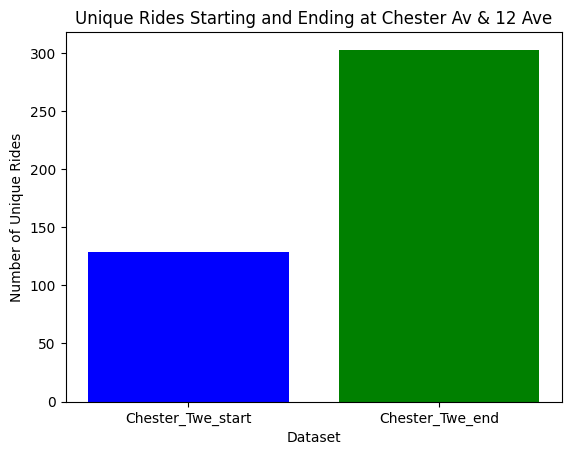

In [108]:
# prompt: Using Chester_Twe_start and Chester_Twe_end data sets, plot bar graph for number of unique values for 'ride_id' - blue for Chester_Twe_start value and green for Chester_Twe_end value

import matplotlib.pyplot as plt

# Count unique ride IDs
start_count = Chester_Twe_start['ride_id'].nunique()
end_count = Chester_Twe_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['Chester_Twe_start', 'Chester_Twe_end'], [start_count, end_count], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Chester Av & 12 Ave')
plt.show()


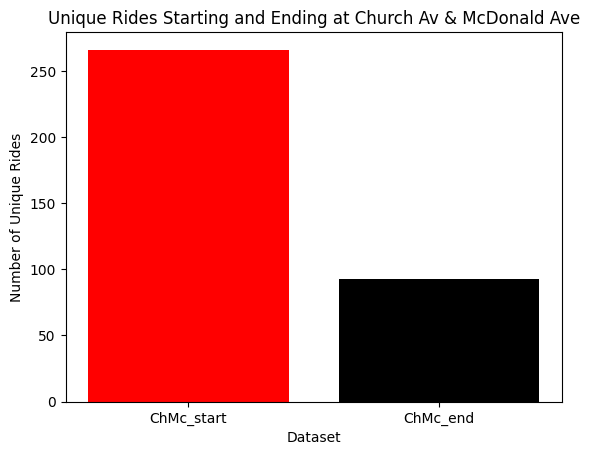

In [109]:
# Count unique ride IDs
start_count = ChMc_start['ride_id'].nunique()
end_count = ChMc_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['ChMc_start', 'ChMc_end'], [start_count, end_count], color=['red', 'black'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Church Av & McDonald Ave')
plt.show()

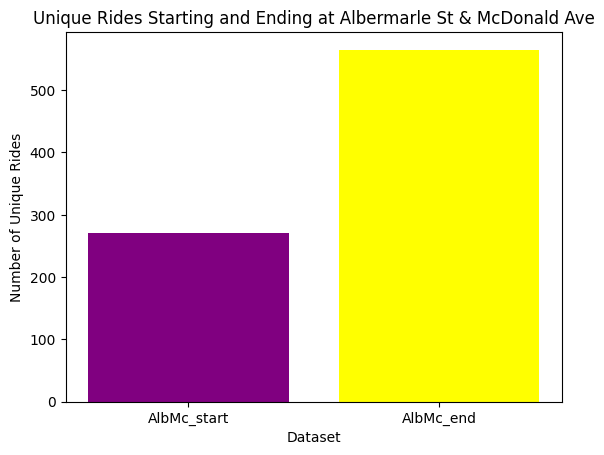

In [110]:
# Count unique ride IDs
start_count = AlbMc_start['ride_id'].nunique()
end_count = AlbMc_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['AlbMc_start', 'AlbMc_end'], [start_count, end_count], color=['purple', 'yellow'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Albermarle St & McDonald Ave')
plt.show()

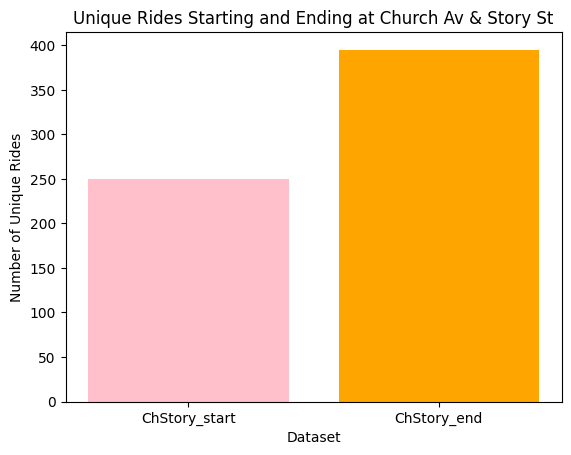

In [160]:
# Count unique ride IDs
start_count = ChStory_start['ride_id'].nunique()
end_count = ChStory_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['ChStory_start', 'ChStory_end'], [start_count, end_count], color=['pink', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Church Av & Story St')
plt.show()

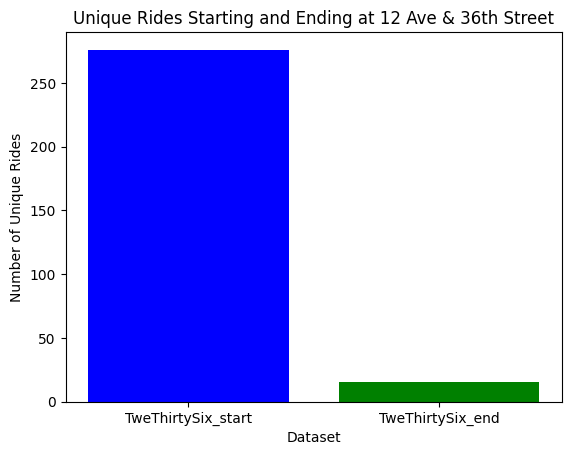

In [161]:
# Count unique ride IDs
start_count = TweThirtySix_start['ride_id'].nunique()
end_count = TweThirtySix_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['TweThirtySix_start', 'TweThirtySix_end'], [start_count, end_count], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at 12 Ave & 36th Street')
plt.show()

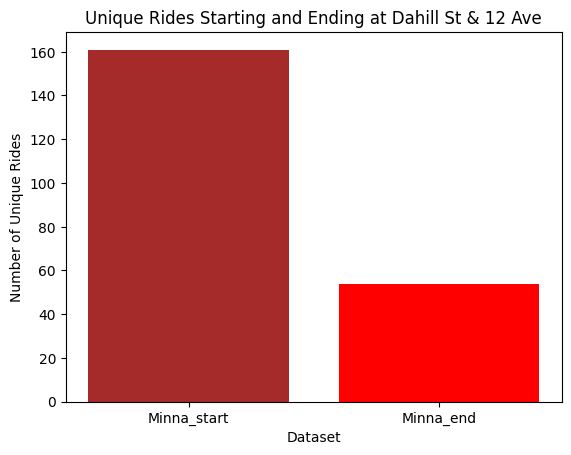

In [162]:
# Count unique ride IDs
start_count = Minna_start['ride_id'].nunique()
end_count = Minna_end['ride_id'].nunique()

# Plot bar graph
plt.bar(['Minna_start', 'Minna_end'], [start_count, end_count], color=['brown', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Number of Unique Rides')
plt.title('Unique Rides Starting and Ending at Dahill St & 12 Ave')
plt.show()

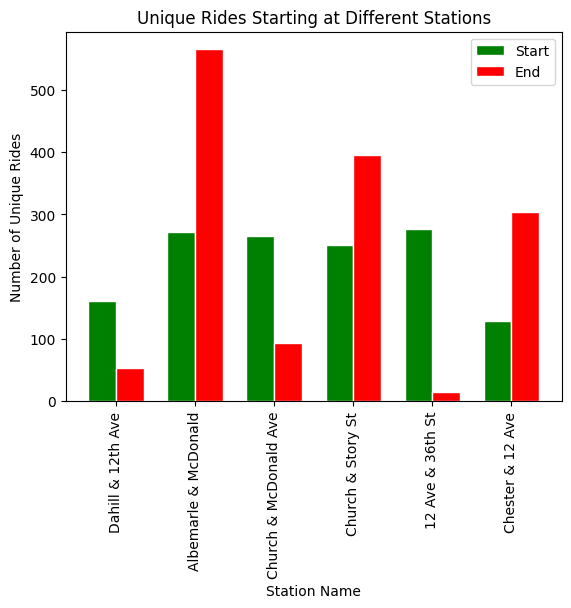

In [171]:
# prompt: Plot singular bar graph for number of unique values for 'ride_id' pairing the following data sets: Chester_Twe_start and Chester_Twe_end, ChMc_start and ChMc_end, ChStory_start and ChStory_end, AlbMc_start and Alb_end, TweThirtySix_start and Twe_ThirtySix_end, Minna_start and Minna_end

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
    'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')
plt.legend()

# Display the graph
plt.show()


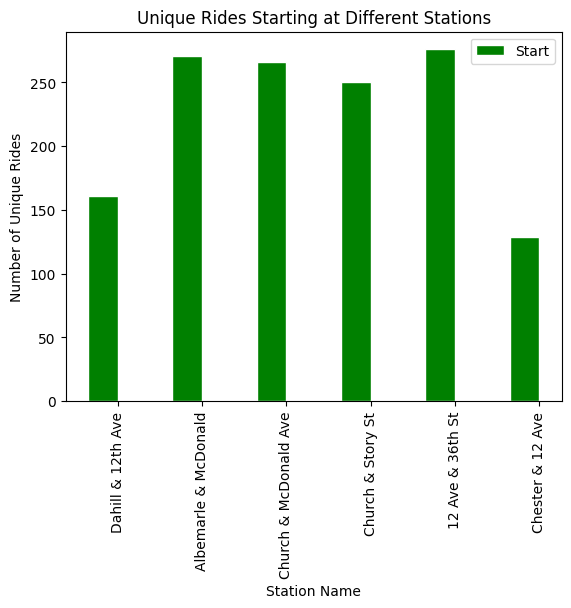

In [115]:
# prompt: Replot the above bar graph with vertical text in x-axis

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]


# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'

]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')

plt.legend()

# Display the graph
plt.show()


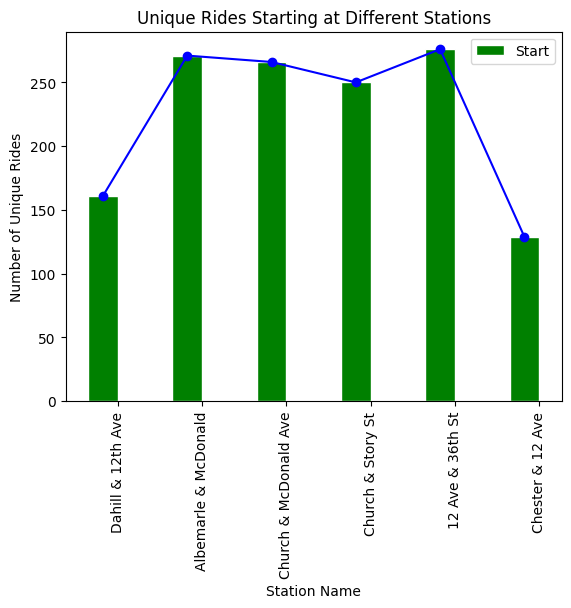

In [166]:
# prompt: Generate the above bar chart with a line connecting the tops of the six bars

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]


# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'

]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r1, start_counts, color='green', width=bar_width, edgecolor='white', label='Start')

# Add a line connecting the tops of the bars
plt.plot(r1, start_counts, color='blue', marker='o')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Starting at Different Stations')

plt.legend()

# Display the graph
plt.show()


In [164]:
# prompt: show value of average number of unique rides for the above bar graph

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_starts = sum(start_counts) / len(start_counts)

print("Average number of unique rides starting at these stations: ", average_starts)


Average number of unique rides starting at these stations:  225.5


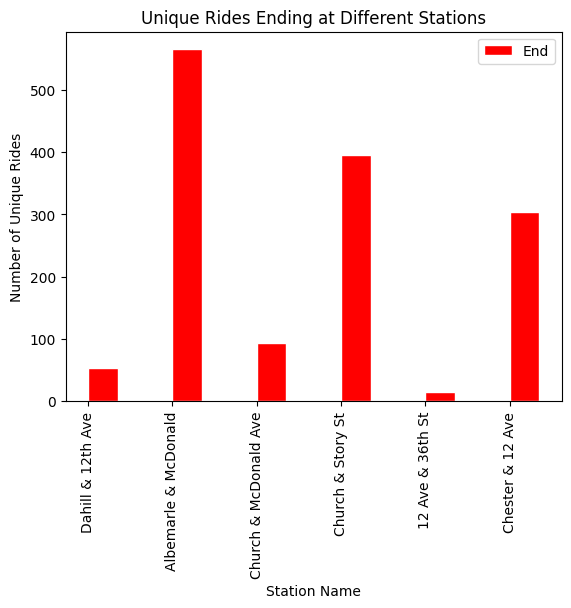

In [168]:
# prompt: Plot singular bar graph for number of unique values for 'ride_id' pairing the following data sets: Chester_Twe_start and Chester_Twe_end, ChMc_start and ChMc_end, ChStory_start and ChStory_end, AlbMc_start and Alb_end, TweThirtySix_start and Twe_ThirtySix_end, Minna_start and Minna_end

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Ending at Different Stations')
plt.legend()

# Display the graph
plt.show()


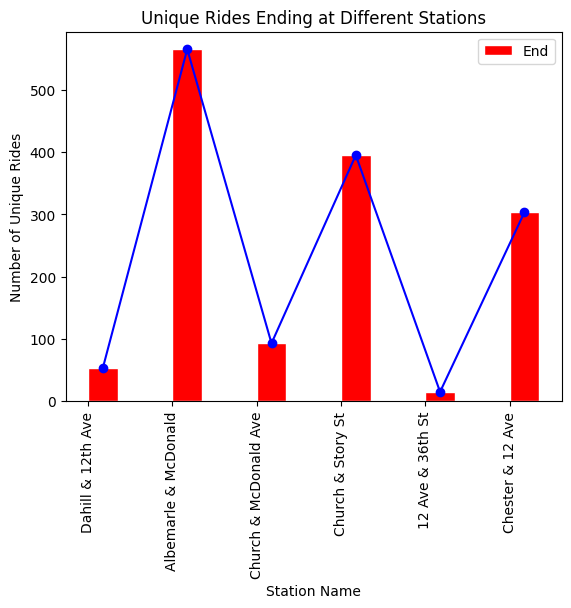

In [169]:
# prompt: Generate the above bar chart with a line connecting the tops of the six bars

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Labels for the bars
labels = [
'Dahill & 12th Ave',
'Albemarle & McDonald',
'Church & McDonald Ave',
'Church & Story St',
'12 Ave & 36th St',
'Chester & 12 Ave'
]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(start_counts))
r2 = [x + bar_width for x in r1]

# Plot the bar graph
plt.bar(r2, end_counts, color='red', width=bar_width, edgecolor='white', label='End')

# Add a line connecting the tops of the bars
plt.plot(r2, end_counts, color='blue', marker='o')

# Add labels, title, and legend
plt.xlabel('Station Name')
plt.ylabel('Number of Unique Rides')
plt.xticks([r + bar_width/2 for r in range(len(start_counts))], labels, rotation='vertical')
plt.title('Unique Rides Ending at Different Stations')
plt.legend()

# Display the graph
plt.show()


In [165]:
# prompt: show value of average number of unique rides for the above bar graph

# Count unique ride IDs for each dataset

end_counts = [
    Chester_Twe_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Minna_end['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_ends = sum(end_counts) / len(end_counts)

print("Average number of unique rides ending at these stations: ", average_ends)


Average number of unique rides ending at these stations:  237.5


In [172]:
# prompt: show value of average number of unique rides for Minna_end, ChMc_end, and TweThirtySix_end

# Count unique ride IDs for each dataset

end_counts = [
    Minna_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique()
]

# Calculate the average number of unique rides
average_ends = sum(end_counts) / len(end_counts)

print("Average number of unique rides ending at these stations: ", average_ends)


Average number of unique rides ending at these stations:  54.0


In [117]:
# prompt: Calculate difference in minutes between 'ended_at_time' and 'started_at_time' in a new column called 'triplength'

df['triplength'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 60
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_time,ended_at_time,triplength
0,FE6A074FC945A086,electric_bike,2024-05-01 08:05:53,2024-05-01 08:15:14,1 Ave & E 30 St,6079.03,E 74 St & 1 Ave,6953.08,40.741509,-73.975355,40.768974,-73.954823,member,08:05:53,08:15:14,9.350000
1,6844CF42F72827D7,classic_bike,2024-05-10 15:00:06,2024-05-10 15:08:58,31 Ave & 57 St,6621.06,31 Ave & Steinway St,6782.01,40.757357,-73.904726,40.761149,-73.917007,member,15:00:06,15:08:58,8.866667
2,D7C9E007F791A7A2,classic_bike,2024-05-06 12:28:39,2024-05-06 12:35:21,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member,12:28:39,12:35:21,6.700000
3,3419650E2F5999F1,classic_bike,2024-05-16 16:09:14,2024-05-16 16:14:20,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member,16:09:14,16:14:20,5.100000
4,5469FDC75E0F1FCA,electric_bike,2024-05-29 15:43:37,2024-05-29 15:49:27,1 Ave & E 30 St,6079.03,E 45 St & 3 Ave,6464.08,40.741444,-73.975361,40.752554,-73.972826,member,15:43:37,15:49:27,5.833333


In [118]:
ChMc_start['triplength'] = (pd.to_datetime(ChMc_start['ended_at']) - pd.to_datetime(ChMc_start['started_at'])).dt.total_seconds() / 60
ChMc_start.head()

<ipython-input-118-8eaa1528f282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChMc_start['triplength'] = (pd.to_datetime(ChMc_start['ended_at']) - pd.to_datetime(ChMc_start['started_at'])).dt.total_seconds() / 60


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_time,ended_at_time,triplength
4371,D3D384E59446BB31,electric_bike,2024-05-13 17:11:28,2024-05-13 17:38:03,Church Ave & McDonald Ave,3090.06,Nevins St & Schermerhorn St,4437.09,40.642854,-73.979311,40.687372,-73.981761,member,17:11:28,17:38:03,26.583333
89727,CDF954165FE928F6,electric_bike,2024-05-22 16:31:29,2024-05-22 16:46:23,Church Ave & McDonald Ave,3090.06,5 Ave & 3 St,3987.06,40.642854,-73.979085,40.672815,-73.983524,casual,16:31:29,16:46:23,14.900000
113093,E2FACB93C56A1BC5,electric_bike,2024-05-02 11:46:11,2024-05-02 12:20:14,Church Ave & McDonald Ave,3090.06,Columbia St & Kane St,4422.05,40.642844,-73.979250,40.687632,-74.001626,casual,11:46:11,12:20:14,34.050000
121697,B032C445C47737CC,electric_bike,2024-05-15 02:29:18,2024-05-15 02:38:43,Church Ave & McDonald Ave,3090.06,Ocean Ave & Tennis Ct,3223.07,40.642809,-73.979239,40.648730,-73.960840,casual,02:29:18,02:38:43,9.416667
133020,84559411F4A6702D,electric_bike,2024-05-18 08:14:40,2024-05-18 08:33:22,Church Ave & McDonald Ave,3090.06,7 Ave & Park Pl,4125.07,40.642860,-73.979131,40.677615,-73.973243,casual,08:14:40,08:33:22,18.700000


In [119]:
ChMc_end['triplength'] = (pd.to_datetime(ChMc_end['ended_at']) - pd.to_datetime(ChMc_end['started_at'])).dt.total_seconds() / 60
ChMc_end.head().T

<ipython-input-119-9b66d49d5c7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChMc_end['triplength'] = (pd.to_datetime(ChMc_end['ended_at']) - pd.to_datetime(ChMc_end['started_at'])).dt.total_seconds() / 60


,8320,25331,25499,25500,25787
ride_id,2AC7ECBF13B727C4,06ECCBB4114B2B7A,3F5F7EEF2B84753B,1EB77AAB0612A92C,B4D5753B71DC7BB3
rideable_type,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike
started_at,2024-05-21 17:36:04,2024-05-07 19:57:37,2024-05-18 09:04:24,2024-05-18 09:04:44,2024-05-12 12:36:22
ended_at,2024-05-21 17:50:48,2024-05-07 20:07:27,2024-05-18 10:09:05,2024-05-18 10:09:35,2024-05-12 12:44:07
start_station_name,10 St & 5 Ave,Rogers Ave & Snyder Ave,7 Ave & 22 St,7 Ave & 22 St,Greenwood Ave & E 4 St
start_station_id,3842.08,3286.07,3515.01,3515.01,3353.04
end_station_name,Church Ave & McDonald Ave,Church Ave & McDonald Ave,Church Ave & McDonald Ave,Church Ave & McDonald Ave,Church Ave & McDonald Ave
end_station_id,3090.06,3090.06,3090.06,3090.06,3090.06
start_lat,40.668694,40.648516,40.65798,40.657974,40.650739
start_lng,-73.987139,-73.952331,-73.989731,-73.989698,-73.977739


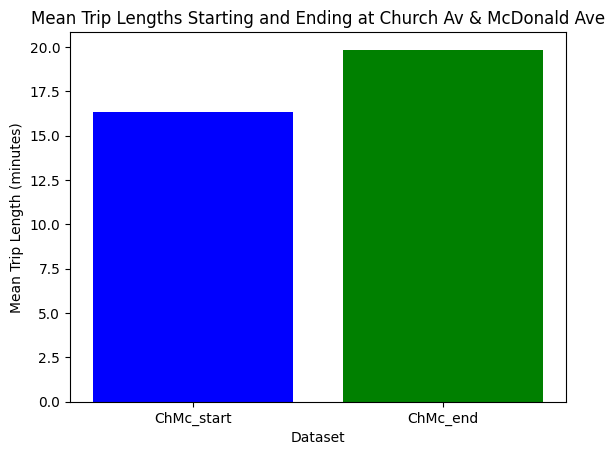

In [120]:
# prompt: generate mean values of 'triplength' column for ChMc_end and ChMc_start dataframes, and plot in a bar graph

# Calculate mean trip lengths
mean_start_length = ChMc_start['triplength'].mean()
mean_end_length = ChMc_end['triplength'].mean()

# Plot bar graph
plt.bar(['ChMc_start', 'ChMc_end'], [mean_start_length, mean_end_length], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Trip Length (minutes)')
plt.title('Mean Trip Lengths Starting and Ending at Church Av & McDonald Ave')
plt.show()


In [121]:
#generating 'triplength' values for all departing and arriving trips at all 6 stations#

Minna_start['triplength'] = (pd.to_datetime(Minna_start['ended_at']) - pd.to_datetime(Minna_start['started_at'])).dt.total_seconds() / 60
Minna_end['triplength'] = (pd.to_datetime(Minna_end['ended_at']) - pd.to_datetime(Minna_end['started_at'])).dt.total_seconds() / 60

Chester_Twe_start['triplength'] = (pd.to_datetime(Chester_Twe_start['ended_at']) - pd.to_datetime(Chester_Twe_start['started_at'])).dt.total_seconds() / 60
Chester_Twe_end['triplength'] = (pd.to_datetime(Chester_Twe_end['ended_at']) - pd.to_datetime(Chester_Twe_end['started_at'])).dt.total_seconds() / 60

TweThirtySix_start['triplength'] = (pd.to_datetime(TweThirtySix_start['ended_at']) - pd.to_datetime(TweThirtySix_start['started_at'])).dt.total_seconds() / 60
TweThirtySix_end['triplength'] = (pd.to_datetime(TweThirtySix_end['ended_at']) - pd.to_datetime(TweThirtySix_end['started_at'])).dt.total_seconds() / 60

ChMc_start['triplength'] = (pd.to_datetime(ChMc_start['ended_at']) - pd.to_datetime(ChMc_start['started_at'])).dt.total_seconds() / 60
ChMc_end['triplength'] = (pd.to_datetime(ChMc_end['ended_at']) - pd.to_datetime(ChMc_end['started_at'])).dt.total_seconds() / 60

ChStory_start['triplength'] = (pd.to_datetime(ChStory_start['ended_at']) - pd.to_datetime(ChStory_start['started_at'])).dt.total_seconds() / 6
ChStory_end['triplength'] = (pd.to_datetime(ChStory_end['ended_at']) - pd.to_datetime(ChStory_end['started_at'])).dt.total_seconds() / 6

AlbMc_start['triplength'] = (pd.to_datetime(AlbMc_start['ended_at']) - pd.to_datetime(AlbMc_start['started_at'])).dt.total_seconds() / 6
AlbMc_end['triplength'] = (pd.to_datetime(AlbMc_end['ended_at']) - pd.to_datetime(AlbMc_end['started_at'])).dt.total_seconds() / 6


<ipython-input-121-d05b04a6c28b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Minna_start['triplength'] = (pd.to_datetime(Minna_start['ended_at']) - pd.to_datetime(Minna_start['started_at'])).dt.total_seconds() / 60
<ipython-input-121-d05b04a6c28b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Minna_end['triplength'] = (pd.to_datetime(Minna_end['ended_at']) - pd.to_datetime(Minna_end['started_at'])).dt.total_seconds() / 60
<ipython-input-121-d05b04a6c28b>:6: SettingWithCopyWarning: 
A value is trying

In [122]:


median_Minna_start = round(Minna_start['triplength'].median())
median_Chester_Twe_start = round(Chester_Twe_start['triplength'].median()) # Now this line should work
median_TweThirtySix_start = round(TweThirtySix_start['triplength'].median())
median_ChMc_start = round(ChMc_start['triplength'].median())
median_ChStory_start = round(ChStory_start['triplength'].median())
median_AlbMc_start = round(AlbMc_start['triplength'].median())

In [123]:
# prompt: calculate and print median values for dataframes
# Minna_start
# Chester_Twe_start
# TweThirtySix_start
# ChMc_start
# ChStory_start
# AlbMc_start
# and round the median values to the nearest integer

# Calculate median trip lengths and round to nearest integer
median_Minna_start = round(Minna_start['triplength'].median())
median_Chester_Twe_start = round(Chester_Twe_start['triplength'].median())
median_TweThirtySix_start = round(TweThirtySix_start['triplength'].median())
median_ChMc_start = round(ChMc_start['triplength'].median())
median_ChStory_start = round(ChStory_start['triplength'].median())
median_AlbMc_start = round(AlbMc_start['triplength'].median())

# Print median values
print("Median trip length from Minna_start:", median_Minna_start)
print("Median trip length from Chester_Twe_start:", median_Chester_Twe_start)
print("Median trip length from TweThirtySix_start:", median_TweThirtySix_start)
print("Median trip length from ChMc_start:", median_ChMc_start)
print("Median trip length from ChStory_start:", median_ChStory_start)
print("Median trip length from AlbMc_start:", median_AlbMc_start)


Median trip length from Minna_start: 12
Median trip length from Chester_Twe_start: 11
Median trip length from TweThirtySix_start: 16
Median trip length from ChMc_start: 11
Median trip length from ChStory_start: 186
Median trip length from AlbMc_start: 90


In [124]:
# Calculate difference in minutes between 'ended_at_time' and 'started_at_time' in a new column called 'triplength' for Minna_start

Minna_start['triplength'] = (pd.to_datetime(Minna_start['ended_at']) - pd.to_datetime(Minna_start['started_at'])).dt.total_seconds() / 60
# Add the 'triplength' column to Minna_start, similar to what was done for the general df

# Calculate median trip lengths and round to nearest integer
median_Minna_start = round(Minna_start['triplength'].median())
# Now this line should work without raising a KeyError
median_Chester_Twe_start = round(Chester_Twe_start['triplength'].median())
median_TweThirtySix_start = round(TweThirtySix_start['triplength'].median())
median_ChMc_start = round(ChMc_start['triplength'].median())
median_ChStory_start = round(ChStory_start['triplength'].median())
median_AlbMc_start = round(AlbMc_start['triplength'].median())

# Print median values
print("Median trip length from Minna_start:", median_Minna_start)
print("Median trip length from Chester_Twe_start:", median_Chester_Twe_start)
print("Median trip length from TweThirtySix_start:", median_TweThirtySix_start)
print("Median trip length from ChMc_start:", median_ChMc_start)
print("Median trip length from ChStory_start:", median_ChStory_start)
print("Median trip length from AlbMc_start:", median_AlbMc_start)

Median trip length from Minna_start: 12
Median trip length from Chester_Twe_start: 11
Median trip length from TweThirtySix_start: 16
Median trip length from ChMc_start: 11
Median trip length from ChStory_start: 186
Median trip length from AlbMc_start: 90


<ipython-input-124-28485f54891d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Minna_start['triplength'] = (pd.to_datetime(Minna_start['ended_at']) - pd.to_datetime(Minna_start['started_at'])).dt.total_seconds() / 60


In [125]:
Minna_end['triplength'] = (pd.to_datetime(Minna_end['ended_at']) - pd.to_datetime(Minna_end['started_at'])).dt.total_seconds() / 60
# Add the 'triplength' column to Minna_end, similar to what was done for the general df

# Calculate median trip lengths
median_Minna_end = round(Minna_end['triplength'].median())
median_Chester_Twe_end = round(Chester_Twe_end['triplength'].median())
median_TweThirtySix_end = round(TweThirtySix_end['triplength'].median())
median_ChMc_end = round(ChMc_end['triplength'].median())
median_ChStory_end = round(ChStory_end['triplength'].median())
median_AlbMc_end = round(AlbMc_end['triplength'].median())

# Print median values
print("Median trip length for Minna_end:", median_Minna_end)
print("Median trip length for Chester_Twe_end:", median_Chester_Twe_end)
print("Median trip length for TweThirtySix_end:", median_TweThirtySix_end)
print("Median trip length for ChMc_end:", median_ChMc_end)
print("Median trip length for ChStory_end:", median_ChStory_end)
print("Median trip length for AlbMc_end:", median_AlbMc_end)

Median trip length for Minna_end: 10
Median trip length for Chester_Twe_end: 11
Median trip length for TweThirtySix_end: 14
Median trip length for ChMc_end: 12
Median trip length for ChStory_end: 160
Median trip length for AlbMc_end: 106


<ipython-input-125-06c5cb34deeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Minna_end['triplength'] = (pd.to_datetime(Minna_end['ended_at']) - pd.to_datetime(Minna_end['started_at'])).dt.total_seconds() / 60


In [126]:
mean_ChStory_end = round(ChStory_end['triplength'].mean())
print("Mean trip length for ChStory_end:", mean_ChStory_end)

Mean trip length for ChStory_end: 218


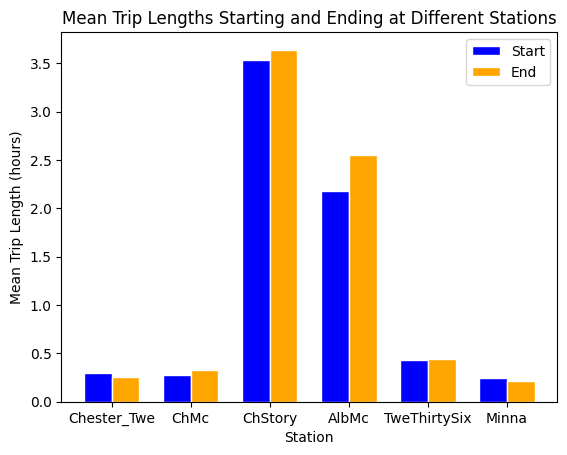

In [127]:
# prompt: generate mean values of 'triplength' column for the following dataframes:
# Minna_start & Minna_end
# Chester_Twe_start & Chester_Twe_end
# TweThirtySix_start & TweThirtySix_end
# ChMc_start & ChMc_end
# ChStory_start & ChStory_end
# AlbMc_start & AlbMc_end
# and plot in a bar graph, converting total minutes into hours

# Calculate mean trip lengths in minutes
mean_Minna_start = Minna_start['triplength'].mean()
mean_Minna_end = Minna_end['triplength'].mean()

mean_Chester_Twe_start = Chester_Twe_start['triplength'].mean()
mean_Chester_Twe_end = Chester_Twe_end['triplength'].mean()

mean_TweThirtySix_start = TweThirtySix_start['triplength'].mean()
mean_TweThirtySix_end = TweThirtySix_end['triplength'].mean()

mean_ChMc_start = ChMc_start['triplength'].mean()
mean_ChMc_end = ChMc_end['triplength'].mean()

mean_ChStory_start = ChStory_start['triplength'].mean()
mean_ChStory_end = ChStory_end['triplength'].mean()

mean_AlbMc_start = AlbMc_start['triplength'].mean()
mean_AlbMc_end = AlbMc_end['triplength'].mean()

# Convert minutes to hours
mean_Minna_start_hours = mean_Minna_start / 60
mean_Minna_end_hours = mean_Minna_end / 60

mean_Chester_Twe_start_hours = mean_Chester_Twe_start / 60
mean_Chester_Twe_end_hours = mean_Chester_Twe_end / 60

mean_TweThirtySix_start_hours = mean_TweThirtySix_start / 60
mean_TweThirtySix_end_hours = mean_TweThirtySix_end / 60

mean_ChMc_start_hours = mean_ChMc_start / 60
mean_ChMc_end_hours = mean_ChMc_end / 60

mean_ChStory_start_hours = mean_ChStory_start / 60
mean_ChStory_end_hours = mean_ChStory_end / 60

mean_AlbMc_start_hours = mean_AlbMc_start / 60
mean_AlbMc_end_hours = mean_AlbMc_end / 60

# Create lists for plotting
start_means_hours = [
    mean_Chester_Twe_start_hours,
    mean_ChMc_start_hours,
    mean_ChStory_start_hours,
    mean_AlbMc_start_hours,
    mean_TweThirtySix_start_hours,
    mean_Minna_start_hours
]

end_means_hours = [
    mean_Chester_Twe_end_hours,
    mean_ChMc_end_hours,
    mean_ChStory_end_hours,
    mean_AlbMc_end_hours,
    mean_TweThirtySix_end_hours,
    mean_Minna_end_hours
]

labels = [
    'Chester_Twe',
    'ChMc',
    'ChStory',
    'AlbMc',
    'TweThirtySix',
    'Minna'
]

# Plot bar graph
bar_width = 0.35
r1 = range(len(start_means_hours))
r2 = [x + bar_width for x in r1]

plt.bar(r1, start_means_hours, color='blue', width=bar_width, edgecolor='white', label='Start')
plt.bar(r2, end_means_hours, color='orange', width=bar_width, edgecolor='white', label='End')

plt.xlabel('Station')
plt.ylabel('Mean Trip Length (hours)')
plt.title('Mean Trip Lengths Starting and Ending at Different Stations')
plt.xticks([r + bar_width/2 for r in range(len(start_means_hours))], labels)
plt.legend()

plt.show()


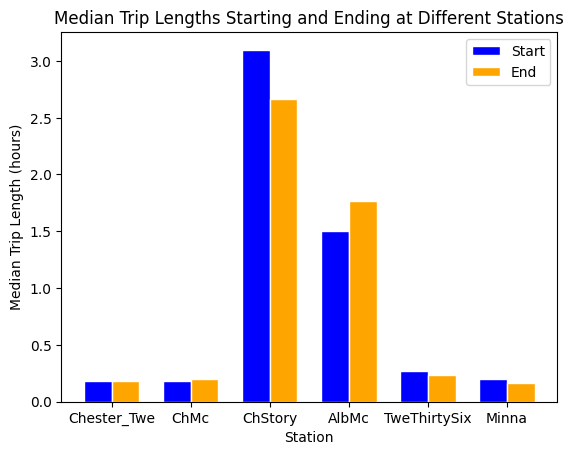

In [128]:
# prompt: generate median values of 'triplength' column for the following dataframes:
# Minna_start & Minna_end
# Chester_Twe_start & Chester_Twe_end
# TweThirtySix_start & TweThirtySix_end
# ChMc_start & ChMc_end
# ChStory_start & ChStory_end
# AlbMc_start & AlbMc_end
# and plot in a bar graph, converting total minutes into hours

# Calculate median trip lengths in minutes and round to nearest integer
median_Minna_start = round(Minna_start['triplength'].median())
median_Chester_Twe_start = round(Chester_Twe_start['triplength'].median())
median_TweThirtySix_start = round(TweThirtySix_start['triplength'].median())
median_ChMc_start = round(ChMc_start['triplength'].median())
median_ChStory_start = round(ChStory_start['triplength'].median())
median_AlbMc_start = round(AlbMc_start['triplength'].median())

median_Minna_end = round(Minna_end['triplength'].median())
median_Chester_Twe_end = round(Chester_Twe_end['triplength'].median())
median_TweThirtySix_end = round(TweThirtySix_end['triplength'].median())
median_ChMc_end = round(ChMc_end['triplength'].median())
median_ChStory_end = round(ChStory_end['triplength'].median())
median_AlbMc_end = round(AlbMc_end['triplength'].median())

# Convert minutes to hours
median_Minna_start_hours = median_Minna_start / 60
median_Chester_Twe_start_hours = median_Chester_Twe_start / 60
median_TweThirtySix_start_hours = median_TweThirtySix_start / 60
median_ChMc_start_hours = median_ChMc_start / 60
median_ChStory_start_hours = median_ChStory_start / 60
median_AlbMc_start_hours = median_AlbMc_start / 60

median_Minna_end_hours = median_Minna_end / 60
median_Chester_Twe_end_hours = median_Chester_Twe_end / 60
median_TweThirtySix_end_hours = median_TweThirtySix_end / 60
median_ChMc_end_hours = median_ChMc_end / 60
median_ChStory_end_hours = median_ChStory_end / 60
median_AlbMc_end_hours = median_AlbMc_end / 60

# Create lists for plotting
start_medians_hours = [
    median_Chester_Twe_start_hours,
    median_ChMc_start_hours,
    median_ChStory_start_hours,
    median_AlbMc_start_hours,
    median_TweThirtySix_start_hours,
    median_Minna_start_hours
]

end_medians_hours = [
    median_Chester_Twe_end_hours,
    median_ChMc_end_hours,
    median_ChStory_end_hours,
    median_AlbMc_end_hours,
    median_TweThirtySix_end_hours,
    median_Minna_end_hours
]

labels = [
    'Chester_Twe',
    'ChMc',
    'ChStory',
    'AlbMc',
    'TweThirtySix',
    'Minna'
]

# Plot bar graph
bar_width = 0.35
r1 = range(len(start_medians_hours))
r2 = [x + bar_width for x in r1]

plt.bar(r1, start_medians_hours, color='blue', width=bar_width, edgecolor='white', label='Start')
plt.bar(r2, end_medians_hours, color='orange', width=bar_width, edgecolor='white', label='End')

plt.xlabel('Station')
plt.ylabel('Median Trip Length (hours)')
plt.title('Median Trip Lengths Starting and Ending at Different Stations')
plt.xticks([r + bar_width/2 for r in range(len(start_medians_hours))], labels)
plt.legend()

plt.show()


<ipython-input-129-2213fc00aae3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['triplength'] = filtered_data['triplength'].round()


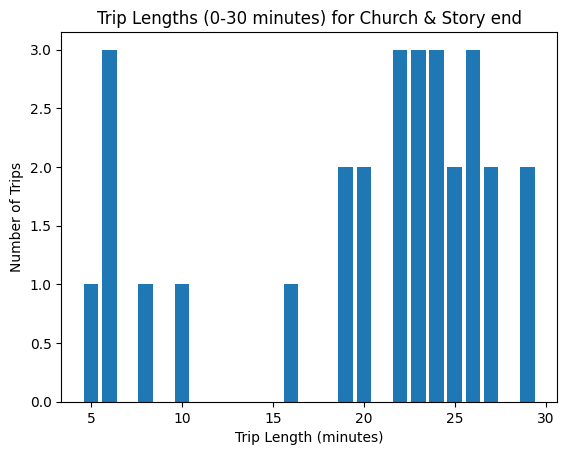

In [129]:
# prompt: plot bar graph for rounded triplength values between 0-20 minutes for dataframe ChStory_end

# Filter data for trip lengths between 0 and 20 minutes
filtered_data = ChStory_end[(ChStory_end['triplength'] >= 0) & (ChStory_end['triplength'] <= 30)]

# Round trip lengths to nearest integer
filtered_data['triplength'] = filtered_data['triplength'].round()

# Count occurrences of each rounded trip length
trip_length_counts = filtered_data['triplength'].value_counts().sort_index()

# Plot bar graph
plt.bar(trip_length_counts.index, trip_length_counts.values)
plt.xlabel('Trip Length (minutes)')
plt.ylabel('Number of Trips')
plt.title('Trip Lengths (0-30 minutes) for Church & Story end')
plt.show()


In [130]:
# prompt: print list of all string values under the 'start_station_name' column for rows where end_station_id value = 3007.05

print(df[df['end_station_id'] == 3007.05]['start_station_name'].unique())


[]


<ipython-input-131-a622be95ba78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['triplength'] = filtered_data['triplength'].round()


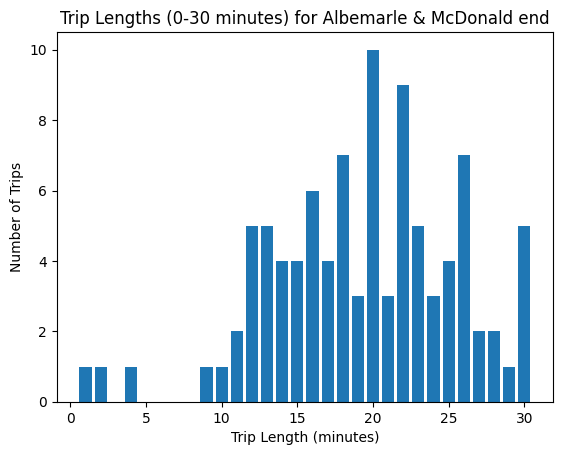

In [131]:
# prompt: plot bar graph for rounded triplength values between 0-30 minutes for dataframe AlbMc_end

# Filter data for trip lengths between 0 and 20 minutes
filtered_data = AlbMc_end[(AlbMc_end['triplength'] >= 0) & (AlbMc_end['triplength'] <= 30)]

# Round trip lengths to nearest integer
filtered_data['triplength'] = filtered_data['triplength'].round()

# Count occurrences of each rounded trip length
trip_length_counts = filtered_data['triplength'].value_counts().sort_index()

# Plot bar graph
plt.bar(trip_length_counts.index, trip_length_counts.values)
plt.xlabel('Trip Length (minutes)')
plt.ylabel('Number of Trips')
plt.title('Trip Lengths (0-30 minutes) for Albemarle & McDonald end')
plt.show()


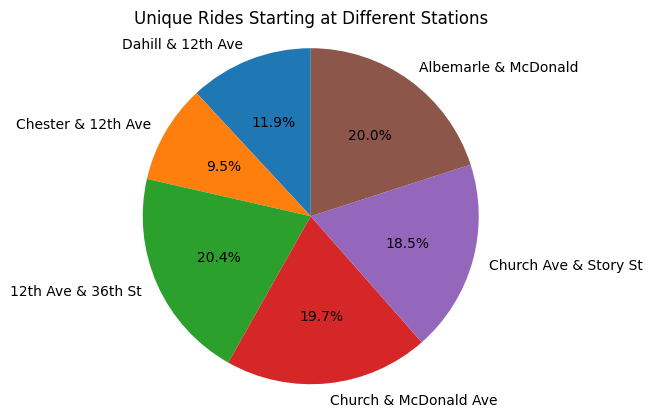

In [132]:
# prompt: Plot pie chart showing total values of totals for 'unique_ride_id' for the following datasets
# Minna_start
# Chester_Twe_start
# TweThirtySix_start
# ChMc_start
# ChStory_start
# AlbMc_start

# Count unique ride IDs for each dataset
start_counts = [
    Minna_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique()
]

# Labels for the pie chart
labels = [
    'Dahill & 12th Ave',
    'Chester & 12th Ave',
    '12th Ave & 36th St',
    'Church & McDonald Ave',
    'Church Ave & Story St',
    'Albemarle & McDonald'
]

# Plot the pie chart
plt.pie(start_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Unique Rides Starting at Different Stations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


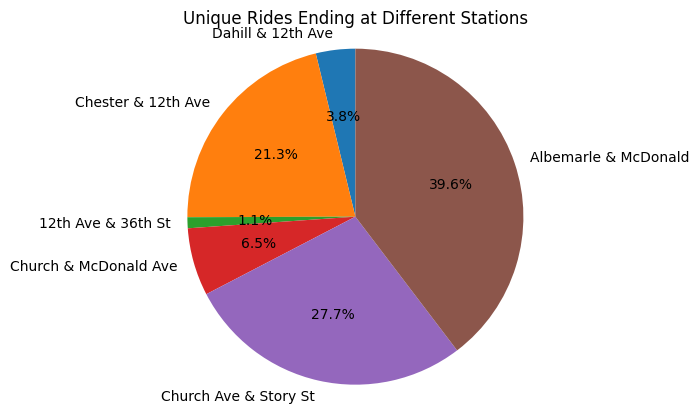

In [133]:
# prompt: Plot pie chart showing total values of totals for 'unique_ride_id' for the following datasets
# Minna_end
# Chester_Twe_end
# TweThirtySix_end
# ChMc_end
# ChStory_end
# AlbMc_end

# Count unique ride IDs for each dataset
end_counts = [
    Minna_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique()
]

# Labels for the pie chart
labels = [
    'Dahill & 12th Ave',
    'Chester & 12th Ave',
    '12th Ave & 36th St',
    'Church & McDonald Ave',
    'Church Ave & Story St',
    'Albemarle & McDonald'
]

# Plot the pie chart
plt.pie(end_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Unique Rides Ending at Different Stations')
(",")
(" ")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


In [134]:
# prompt: Plot a geographic map overlaid on a street map, using 'end_lat' and 'end_lng' coordinates found for dataframes:
#  Minna_end
# Chester_Twe_end
# TweThirtySix_end
# ChMc_end
# ChStory_end
# AlbMc_end

!pip install gmplot

import gmplot

# Create a new map object centered around the mean latitude and longitude of all the dataframes.
# You might need to adjust the center coordinates and zoom level as needed.
gmap = gmplot.GoogleMapPlotter(40.66, -73.98, 13)

# Define a function to plot points for a given dataframe
def plot_end_points(df, color):
  lats = df['end_lat'].tolist()
  lngs = df['end_lng'].tolist()
  gmap.scatter(lats, lngs, color=color, size=50, marker=False)

# Plot points for each dataframe with different colors
plot_end_points(Minna_end, 'blue')
plot_end_points(Chester_Twe_end, 'red')
plot_end_points(TweThirtySix_end, 'green')
plot_end_points(ChMc_end, 'purple')
plot_end_points(ChStory_end, 'orange')
plot_end_points(AlbMc_end, 'yellow')

# Draw the map and save it to an HTML file
gmap.draw("my_map.html")


In [135]:
# prompt: Print a list of unique 'end_lat' and 'end_lng' coordinates for the following stations with these values for 'end_station_id':
# 3208.07
# 3090.06
# 3166.03
# 3007.05
# 3135.04
# 3056.05
# and generate a geographic map plotting these coordinates

# List of station IDs
station_ids = ["3208.07", "3090.06", "3166.03", "3007.05", "3135.04", "3056.05"]

# Create an empty list to store unique coordinates
unique_coords = []

# Iterate over station IDs and extract unique coordinates
for station_id in station_ids:
  subset = df[df['end_station_id'] == station_id]
  unique_coords.extend(subset[['end_lat', 'end_lng']].drop_duplicates().values.tolist())

# Print unique coordinates
print(unique_coords)

# Create a map centered around the mean of the coordinates
mean_lat = sum(coord[0] for coord in unique_coords) / len(unique_coords)
mean_lng = sum(coord[1] for coord in unique_coords) / len(unique_coords)
gmap = gmplot.GoogleMapPlotter(mean_lat, mean_lng, 13)

# Plot the coordinates on the map
lats = [coord[0] for coord in unique_coords]
lngs = [coord[1] for coord in unique_coords]
gmap.scatter(lats, lngs, color='red', size=50, marker=False)

# Draw the map and save it to an HTML file
gmap.draw("my_map.html")


[[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681], [40.642031, -73.981073], [40.644367, -73.984276], [40.643546, -73.986418]]


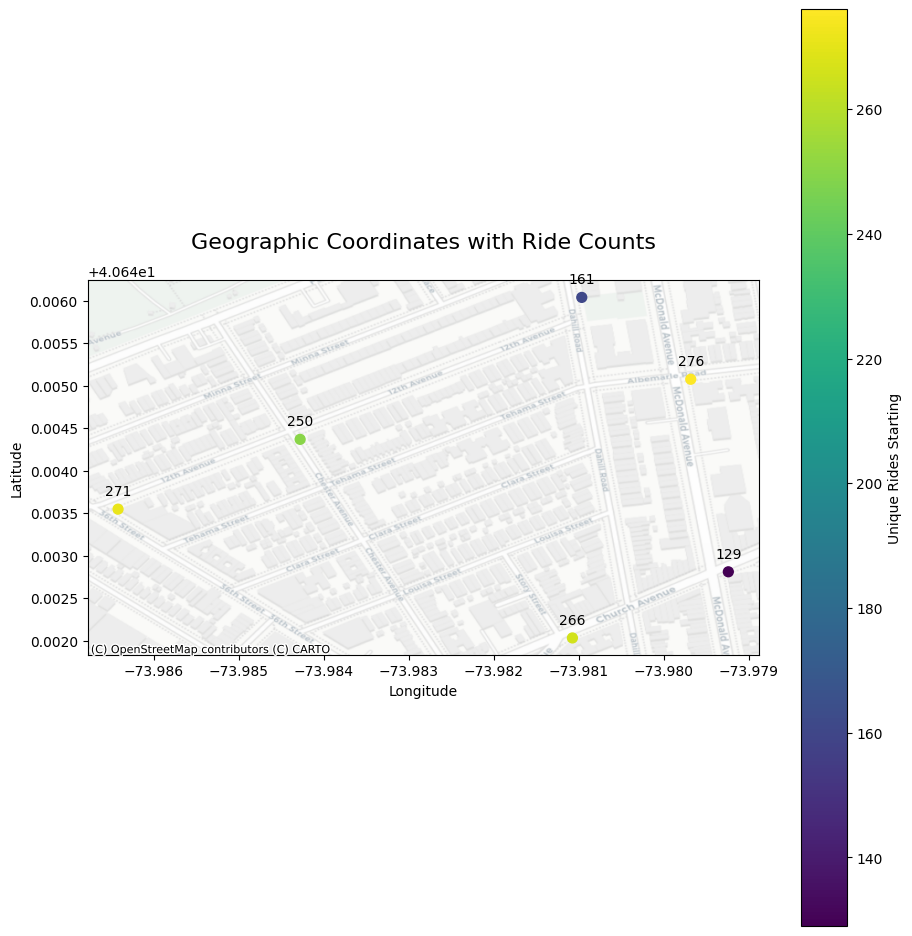

In [138]:
# prompt: Create the above map while showing sum of all unique entries in column 'ride_id' for the following data frames:
# Minna_start, Chester_Twe_start, TweThirtySix_start, ChMc_start, ChStory_start, AlbMc_start. Add extra space below the map title and the map.

!pip install contextily

# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681],
              [40.642031, -73.981073], [40.644367, -73.984276], [40.643546, -73.986418]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Create a scatter plot of the locations with ride counts as labels
fig, ax = plt.subplots(figsize=(10, 10))
sc = ax.scatter(longitudes, latitudes, s=50, c=ride_counts, cmap='viridis', zorder=2)

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Geographic Coordinates with Ride Counts\n', fontsize=16)  # Add extra space below title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar to show ride count values
plt.colorbar(sc, label='Unique Rides Starting')

# Annotate points with ride counts
for i, count in enumerate(ride_counts):
    ax.annotate(str(count), (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)  # Increase pad value for more space

plt.show()


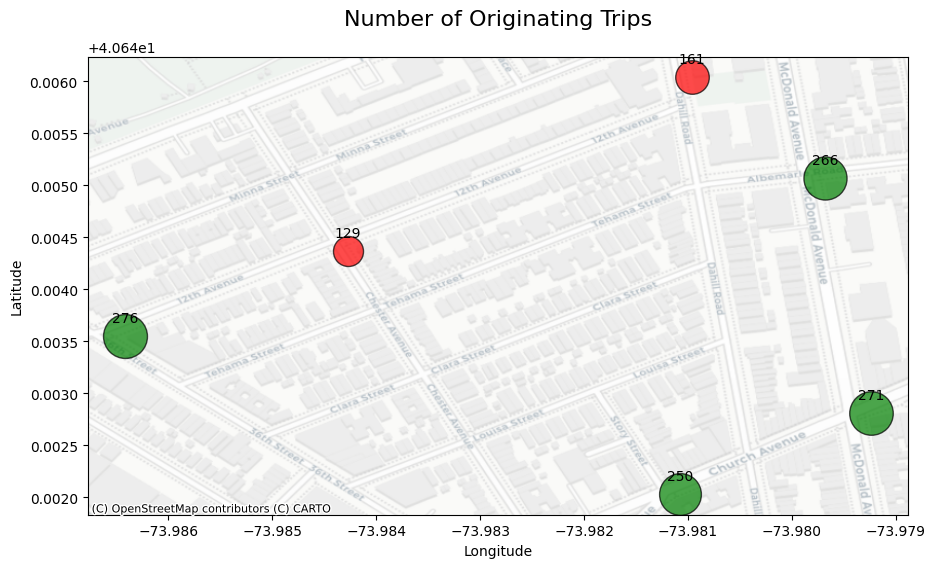

In [178]:
# prompt: Recreate the above map without color bar, and show the total values with corresponding dot sizes larger vs smaller and different colors for each dot

!pip install contextily

# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_start['ride_id'].nunique(),
    AlbMc_start['ride_id'].nunique(),
    ChMc_start['ride_id'].nunique(),
    ChStory_start['ride_id'].nunique(),
    TweThirtySix_start['ride_id'].nunique(),
    Chester_Twe_start['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.642809, -73.979239], [40.645074, -73.979681],
              [40.642031, -73.981073], [40.643546, -73.986418], [40.644367, -73.984276]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Normalize ride counts to scale dot sizes
normalized_counts = [count / max(ride_counts) for count in ride_counts]
sizes = [count * 1000 for count in normalized_counts]  # Adjust scaling factor as needed

# Define colors for each dot
colors = ['red', 'green', 'green', 'green', 'green', 'red']

# Create a scatter plot of the locations with varying dot sizes and colors
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(longitudes)):
    ax.scatter(longitudes[i], latitudes[i], s=sizes[i], c=colors[i], zorder=2, alpha=0.7, edgecolors='black')

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Number of Originating Trips\n', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Annotate points with ride counts
for i, count in enumerate(ride_counts):
    ax.annotate(str(count), (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)

plt.show()


In [180]:
# prompt: show value of total number of unique 'ride_id' for 'AlbMc_end'

# Count unique ride IDs for AlbMc_end
total_unique_rides = AlbMc_end['ride_id'].nunique()

# Print the result
print("Total number of unique 'ride_id' for 'AlbMc_end':", total_unique_rides)


Total number of unique 'ride_id' for 'AlbMc_end': 565


In [181]:
# prompt: show geographic coordinates for 'AlbMc_end' and 'AlbMc_start'

# Extract coordinates for AlbMc_end
albmc_end_coords = AlbMc_end[['end_lat', 'end_lng']].drop_duplicates().values.tolist()
print("Coordinates for AlbMc_end:")
for coord in albmc_end_coords:
  print(coord)

# Extract coordinates for AlbMc_start
albmc_start_coords = AlbMc_start[['start_lat', 'start_lng']].drop_duplicates().values.tolist()
print("\nCoordinates for AlbMc_start:")
for coord in albmc_start_coords:
  print(coord)


Coordinates for AlbMc_end:
[40.645074, -73.979681]

Coordinates for AlbMc_start:
[40.645101309, -73.979642272]
[40.64503479, -73.97964716]
[40.645102501, -73.979667306]
[40.645094991, -73.979700685]
[40.645111799, -73.979643822]
[40.645074, -73.979681]
[40.645069838, -73.979579806]
[40.645132542, -73.979651332]
[40.645089149, -73.979716063]
[40.645028591, -73.979478955]
[40.645046234, -73.979706407]
[40.644593596, -73.979305744]
[40.645089269, -73.97967267]
[40.645070076, -73.979541183]
[40.64507699, -73.979660034]
[40.645088553, -73.979583383]
[40.645199895, -73.979681253]
[40.645086646, -73.979553223]
[40.645159245, -73.979641676]
[40.645090461, -73.979612589]
[40.645064712, -73.979663491]
[40.645196676, -73.979554415]
[40.64509964, -73.979580522]
[40.64509809, -73.979464531]
[40.645125866, -73.979590893]
[40.645140171, -73.97953248]
[40.645129323, -73.979561567]
[40.645227075, -73.979529142]
[40.645150661, -73.979454041]
[40.645025849, -73.979518175]
[40.645178318, -73.979601622]
[4

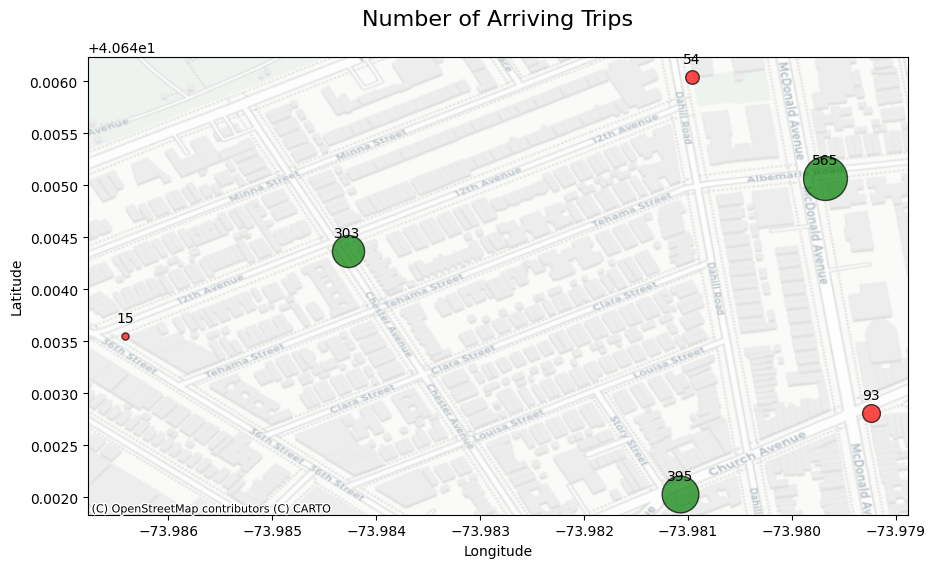

In [183]:
# prompt: Recreate the above map without color bar, and show the total values with corresponding dot sizes larger vs smaller and different colors for each dot, applying to _end trips.

!pip install contextily

# Calculate the sum of unique ride_ids for each dataframe
ride_counts = [
    Minna_end['ride_id'].nunique(),
    AlbMc_end['ride_id'].nunique(),
    ChMc_end['ride_id'].nunique(),
    ChStory_end['ride_id'].nunique(),
    TweThirtySix_end['ride_id'].nunique(),
    Chester_Twe_end['ride_id'].nunique()
]

# Define the coordinates
coordinates = [[40.646037, -73.980963], [40.645074, -73.979681],[40.642809, -73.979239],
              [40.642031, -73.981073], [40.643546, -73.986418], [40.644367, -73.984276]]

# Extract latitudes and longitudes
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Normalize ride counts to scale dot sizes
normalized_counts = [count / max(ride_counts) for count in ride_counts]
sizes = [count * 1000 for count in normalized_counts]  # Adjust scaling factor as needed

# Define colors for each dot
colors = ['red', 'green', 'red', 'green', 'red', 'green']

# Create a scatter plot of the locations with varying dot sizes and colors
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(longitudes)):
    ax.scatter(longitudes[i], latitudes[i], s=sizes[i], c=colors[i], zorder=2, alpha=0.7, edgecolors='black')

# Add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.Positron)

# Set plot title and labels
ax.set_title('Number of Arriving Trips\n', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Annotate points with ride counts
for i, count in enumerate(ride_counts):
    ax.annotate(str(count), (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust layout for extra space below the map
plt.tight_layout(pad=3.0)

plt.show()